In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [6]:
%matplotlib inline

In [7]:
DATA_FILE = 'uber-raw-data-aug14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
3  8/1/2014 0:12:00  40.7387 -73.9856  B02512
4  8/1/2014 0:12:00  40.7323 -74.0077  B02512

In [8]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    829275 non-null object
Lat          829275 non-null float64
Lon          829275 non-null float64
Base         829275 non-null object
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [9]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

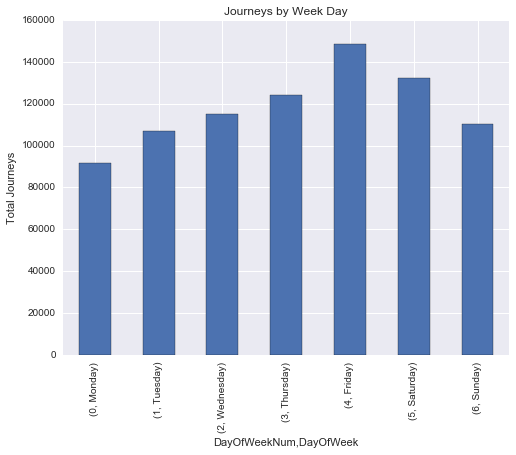

In [10]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

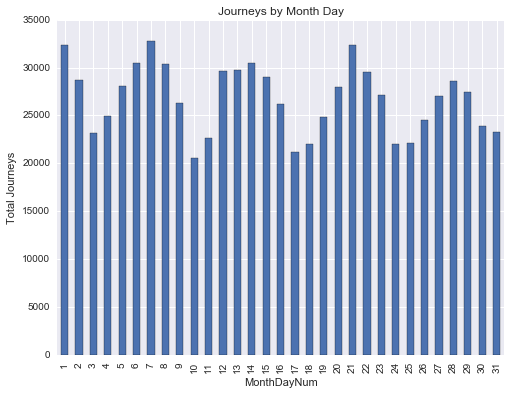

In [11]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

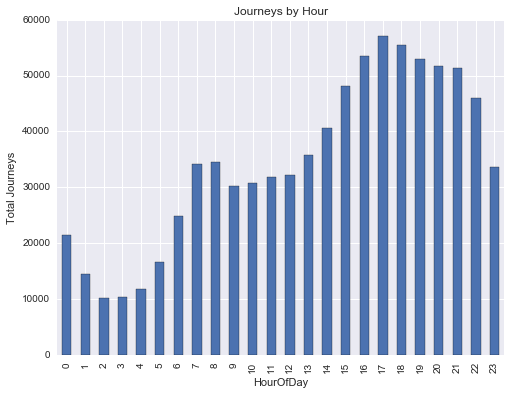

In [21]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.head()
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

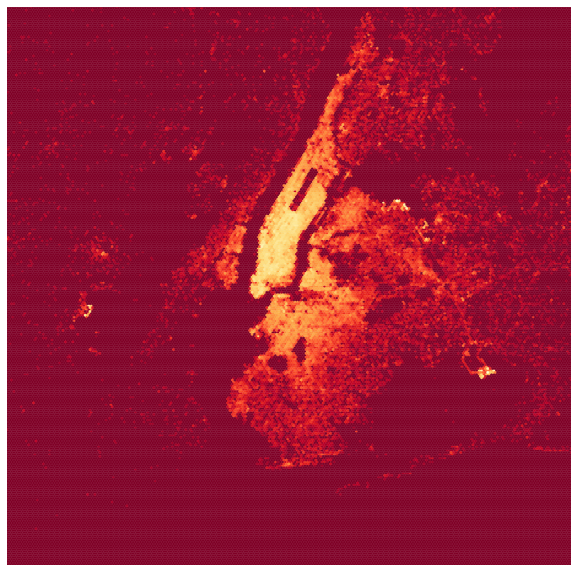

In [15]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);

In [18]:
import matplotlib
import sklearn
import numpy
from sklearn import svm

In [19]:
clf=svm.SVC()

In [22]:
uber_weekdays.head()

DayOfWeekNum  DayOfWeek
0             Monday        91633
1             Tuesday      107124
2             Wednesday    115256
3             Thursday     124117
4             Friday       148674
Name: Base, dtype: int64

In [77]:
d=uber_data['DayOfWeek'].head()

In [58]:
x=uber_data.groupby(['DayOfWeek']).count()

In [71]:
x

Date/Time     Lat     Lon    Base  DayOfWeekNum  MonthDayNum  \
DayOfWeek                                                                 
Friday        148674  148674  148674  148674        148674       148674   
Monday         91633   91633   91633   91633         91633        91633   
Saturday      132225  132225  132225  132225        132225       132225   
Sunday        110246  110246  110246  110246        110246       110246   
Thursday      124117  124117  124117  124117        124117       124117   
Tuesday       107124  107124  107124  107124        107124       107124   
Wednesday     115256  115256  115256  115256        115256       115256   

           HourOfDay  
DayOfWeek             
Friday        148674  
Monday         91633  
Saturday      132225  
Sunday        110246  
Thursday      124117  
Tuesday       107124  
Wednesday     115256

In [65]:
a=x.ix[:,0]
b=x.ix[:,1]

In [68]:
a.head()
#b.head()

DayOfWeek
Friday      148674
Monday       91633
Saturday    132225
Sunday      110246
Thursday    124117
Name: Date/Time, dtype: int64

In [75]:
w=[('mon'),('tues'),('wed'),('thur'),('fri'),('sat'),('sun')]

In [79]:
d

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DayOfWeek, dtype: object

In [81]:
clf.fit(x,a)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1]:
#import matplotlib.pyplot as plt

In [2]:
#plt.imshow(d[10:50].DayOfWeek[0],cmap=plt.cm.gray_r,interpolation="nearest")